In [3]:
#Import dependencies.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

from config import weather_api_key

In [4]:
HTTP_STATUS_OK  = 200
HTTP_STATUS_NOT_FOUND = 404

In [5]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
    
#Print the city count to confirm sufficient count.
len(cities)

624

In [11]:
#Set initial url.
weather_url = f"https://api.openweathermap.org/data/2.5/weather?&units=Imperial&APPID={weather_api_key}"

In [12]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):  # TO DO: Add slicing for running purposes.
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    #Create endpoint url with each city.
    city_url = weather_url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count += 1

#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information to the city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    #If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete.
print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | saint george
Processing Record 7 of Set 1 | myrtle beach
Processing Record 8 of Set 1 | oktyabrskoye
Processing Record 9 of Set 1 | johnstown
Processing Record 10 of Set 1 | swidnica
Processing Record 11 of Set 1 | sarankhola
Processing Record 12 of Set 1 | puksoozero
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | krasnovishersk
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | mala
Processing Record 19 of Set 1 | sorland
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | viedma
Processing Record 22 of Set 1 | shyryayeve
Processing Reco

Processing Record 37 of Set 4 | porto real
Processing Record 38 of Set 4 | luanda
Processing Record 39 of Set 4 | salalah
Processing Record 40 of Set 4 | saint combs
City not found. Skipping...
Processing Record 41 of Set 4 | usinsk
Processing Record 42 of Set 4 | elizabeth city
Processing Record 43 of Set 4 | bjaeverskov
Processing Record 44 of Set 4 | amderma
City not found. Skipping...
Processing Record 45 of Set 4 | saint-pierre
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | kamenka
Processing Record 49 of Set 4 | banepa
Processing Record 50 of Set 4 | sadove
Processing Record 1 of Set 5 | arua
Processing Record 2 of Set 5 | stepnogorsk
Processing Record 3 of Set 5 | paradwip
City not found. Skipping...
Processing Record 4 of Set 5 | rush
Processing Record 5 of Set 5 | pastavy
Processing Record 6 of Set 5 | mutoko
Processing Record 7 of Set 5 | comodoro rivadavia
Processing Record 8 of Set 5 | tiruvottiyur
City 

Processing Record 22 of Set 8 | miedzychod
Processing Record 23 of Set 8 | barcelos
Processing Record 24 of Set 8 | aden
Processing Record 25 of Set 8 | carupano
Processing Record 26 of Set 8 | cururupu
Processing Record 27 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 28 of Set 8 | qasigiannguit
Processing Record 29 of Set 8 | garowe
Processing Record 30 of Set 8 | ilhabela
Processing Record 31 of Set 8 | balkhash
Processing Record 32 of Set 8 | tarko-sale
Processing Record 33 of Set 8 | villazon
Processing Record 34 of Set 8 | santo domingo
Processing Record 35 of Set 8 | saurimo
Processing Record 36 of Set 8 | kargasok
Processing Record 37 of Set 8 | dom pedro
Processing Record 38 of Set 8 | almeria
Processing Record 39 of Set 8 | parrita
Processing Record 40 of Set 8 | warrington
Processing Record 41 of Set 8 | bereda
Processing Record 42 of Set 8 | vagur
Processing Record 43 of Set 8 | ojhar
Processing Record 44 of Set 8 | tiruvallur
Processing Record 45 of Se

Processing Record 12 of Set 12 | esmeraldas
Processing Record 13 of Set 12 | san andres
Processing Record 14 of Set 12 | santa cruz
Processing Record 15 of Set 12 | kangaatsiaq
Processing Record 16 of Set 12 | parauna
Processing Record 17 of Set 12 | paysandu
Processing Record 18 of Set 12 | tigre
Processing Record 19 of Set 12 | beloha
Processing Record 20 of Set 12 | pitimbu
Processing Record 21 of Set 12 | ribeira brava
Processing Record 22 of Set 12 | umm kaddadah
Processing Record 23 of Set 12 | syracuse
Processing Record 24 of Set 12 | arica
Processing Record 25 of Set 12 | tsumeb
Processing Record 26 of Set 12 | renfrew
Processing Record 27 of Set 12 | leshukonskoye
Processing Record 28 of Set 12 | bengkulu
Processing Record 29 of Set 12 | sebinkarahisar
Processing Record 30 of Set 12 | wheeling
Processing Record 31 of Set 12 | miandrivazo
Processing Record 32 of Set 12 | mbandaka
Processing Record 33 of Set 12 | gayny
Processing Record 34 of Set 12 | formoso do araguaia
City no

In [13]:
len(city_data)

573

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,55.38,70,100,10.29,ZA,2022-10-31 04:20:39
1,Hamilton,39.1834,-84.5333,61.09,95,100,5.75,US,2022-10-31 04:18:53
2,Port Alfred,-33.5906,26.8910,56.17,96,88,1.99,ZA,2022-10-31 04:20:40
3,Cape Town,-33.9258,18.4232,57.61,57,0,24.16,ZA,2022-10-31 04:20:03
4,Narsaq,60.9167,-46.0500,21.42,73,61,7.00,GL,2022-10-31 04:20:41
5,Saint George,37.1041,-113.5841,62.26,28,0,13.80,US,2022-10-31 04:17:02
6,Myrtle Beach,33.6891,-78.8867,62.10,82,100,0.00,US,2022-10-31 04:20:23
7,Oktyabrskoye,43.0645,44.7417,32.14,100,95,4.47,RU,2022-10-31 04:20:43
8,Johnstown,40.3267,-78.9220,52.59,63,0,5.75,US,2022-10-31 04:20:44
9,Swidnica,50.8438,16.4886,57.67,84,25,4.76,PL,2022-10-31 04:20:44


In [15]:
new_column_order = ["City", "Country",
                    "Date", "Lat",
                    "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-10-31 04:20:39,-34.5322,20.0403,55.38,70,100,10.29
1,Hamilton,US,2022-10-31 04:18:53,39.1834,-84.5333,61.09,95,100,5.75
2,Port Alfred,ZA,2022-10-31 04:20:40,-33.5906,26.8910,56.17,96,88,1.99
3,Cape Town,ZA,2022-10-31 04:20:03,-33.9258,18.4232,57.61,57,0,24.16
4,Narsaq,GL,2022-10-31 04:20:41,60.9167,-46.0500,21.42,73,61,7.00


In [16]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Get Data for Plotting

In [17]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

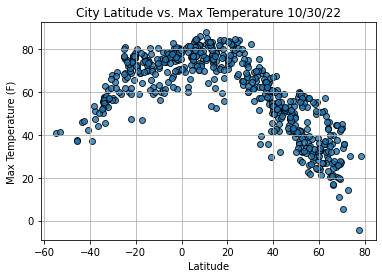

In [19]:
# Build the scatter plot for latitude vs max. temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show the plot.
plt.show()

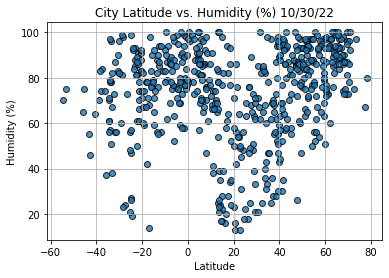

In [20]:
# Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Humidity (%) {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show the plot.
plt.show()

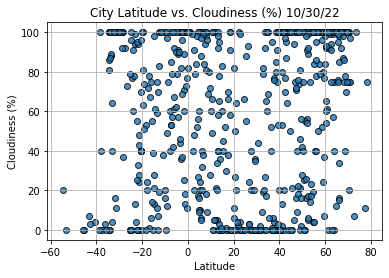

In [21]:
# Build the scatter plot for latitude vs cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show the plot.
plt.show()

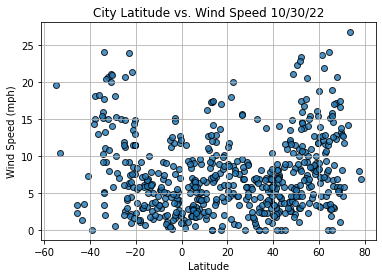

In [47]:
# Build the scatter plot for latitude vs wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show the plot.
plt.show()

### Linear regressions

In [23]:
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2022-10-31 04:20:47
Lat                      -34.4187
Lng                       19.2345
Max Temp                     55.8
Humidity                       71
Cloudiness                    100
Wind Speed                  15.21
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
568     True
569     True
570     True
571    False
572     True
Name: Lat, Length: 573, dtype: bool

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hamilton,US,2022-10-31 04:18:53,39.1834,-84.5333,61.09,95,100,5.75
4,Narsaq,GL,2022-10-31 04:20:41,60.9167,-46.0500,21.42,73,61,7.00
5,Saint George,US,2022-10-31 04:17:02,37.1041,-113.5841,62.26,28,0,13.80
6,Myrtle Beach,US,2022-10-31 04:20:23,33.6891,-78.8867,62.10,82,100,0.00
7,Oktyabrskoye,RU,2022-10-31 04:20:43,43.0645,44.7417,32.14,100,95,4.47


In [26]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-10-31 04:20:39,-34.5322,20.0403,55.38,70,100,10.29
2,Port Alfred,ZA,2022-10-31 04:20:40,-33.5906,26.8910,56.17,96,88,1.99
3,Cape Town,ZA,2022-10-31 04:20:03,-33.9258,18.4232,57.61,57,0,24.16
12,Saint-Joseph,RE,2022-10-31 04:20:46,-21.3667,55.6167,75.58,74,28,11.50
13,Hermanus,ZA,2022-10-31 04:20:47,-34.4187,19.2345,55.80,71,100,15.21


In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

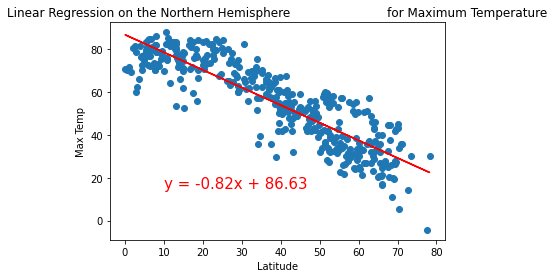

In [30]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,15))

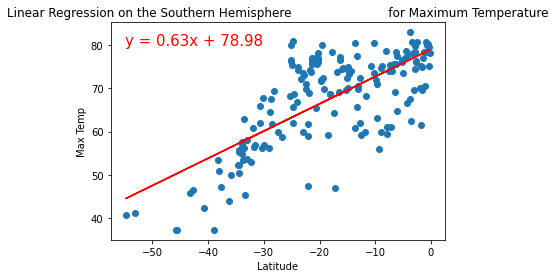

In [32]:
#Linear regression on the Southern Hemisphere. 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55, 80))

In [33]:
linear_regress_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
linear_regress_north

LinregressResult(slope=-0.8205271645371319, intercept=86.62602495130636, rvalue=-0.8790490470201104, pvalue=4.076886395849319e-130, stderr=0.022305503211898888, intercept_stderr=0.9677375417667728)

In [34]:
linear_regress_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
linear_regress_south

LinregressResult(slope=0.6290148710330269, intercept=78.9793511816662, rvalue=0.7213906972720004, pvalue=4.356831038195153e-29, stderr=0.0461774400126628, intercept_stderr=1.0207882619533708)

### Regression lines for humidity

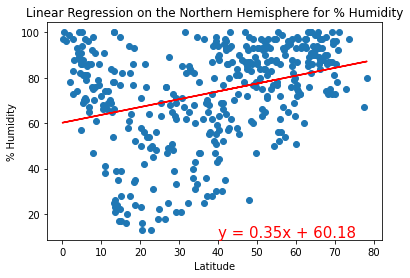

In [35]:
#Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity',
                      '% Humidity', (40,10))

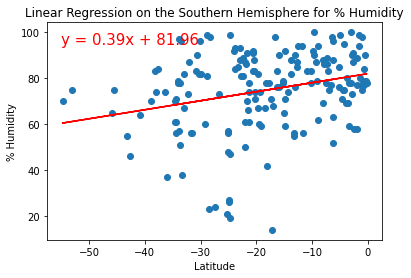

In [36]:
# Linear regression on the Southern Hemisphere. 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Humidity",
                      "% Humidity", (-55, 95))

In [37]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

LinregressResult(slope=0.3450274917371546, intercept=60.17825526626656, rvalue=0.32350459567816553, pvalue=3.3812389696512604e-11, stderr=0.05058559498155878, intercept_stderr=2.1946861665128887)

In [38]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

LinregressResult(slope=0.3917481555303286, intercept=81.96119132189966, rvalue=0.27586302825796943, pvalue=0.000239108841807356, stderr=0.10438252374273724, intercept_stderr=2.307456952148849)

### Regression for latitudes vs. cloudiness

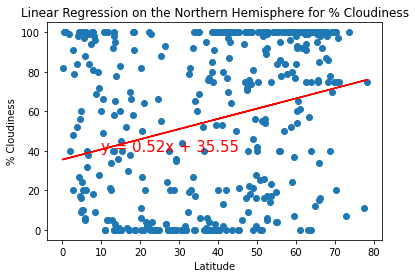

In [39]:
# Create the linear regression for the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere for % Cloudiness",
                      "% Cloudiness", (10, 40))

In [40]:
linregress(x_values, y_values)

LinregressResult(slope=0.5161672354717722, intercept=35.55355683890984, rvalue=0.26611106451910665, pvalue=6.542626713576328e-08, stderr=0.09372102664671686, intercept_stderr=4.066142560306346)

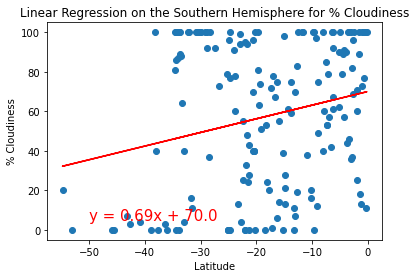

In [41]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Cloudiness",
                      "% Cloudiness", (-50, 5))

In [42]:
linregress(x_values, y_values)

LinregressResult(slope=0.689354082409174, intercept=69.99603229483621, rvalue=0.22757681229198617, pvalue=0.0026020092065192394, stderr=0.2255632151210856, intercept_stderr=4.986250477742537)

### Regression for latitude and wind speed

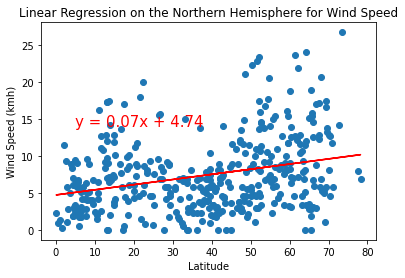

In [43]:
# Linear regression for the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere for Wind Speed",
                      "Wind Speed (kmh)", (5, 14))

In [44]:
linregress(x_values,y_values)

LinregressResult(slope=0.06976175559347232, intercept=4.7387716700317775, rvalue=0.28771923262584365, pvalue=4.6075322317083454e-09, stderr=0.011639737118994133, intercept_stderr=0.5049969274101801)

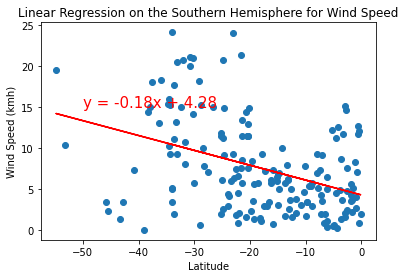

In [45]:
# Linear regression for the northern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Wind Speed",
                      "Wind Speed (kmh)", (-50, 15))

In [46]:
linregress(x_values, y_values)

LinregressResult(slope=-0.18147732844831047, intercept=4.279197857852452, rvalue=-0.3959429582259774, pvalue=6.965130705830291e-08, stderr=0.032185814985355506, intercept_stderr=0.7114924978397311)